In [1]:
pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 9.5 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
# Merge them into a single DataFrame
data = X.copy()
data['Diabetes_binary'] = y

In [ ]:
# Dimensionalidad del dataframe
print(data.shape)

(253680, 22)


In [ ]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [ ]:
print(data.isnull().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [ ]:
# Automatically find binary columns
binary_columns = [col for col in data.columns if set(data[col].unique()).issubset({0, 1})]

# Convert found binary columns to bool
for col in binary_columns:
    data[col] = data[col].astype('bool')

# List of categorical columns to convert
categorical_columns = ['GenHlth', 'Age', 'Education', 'Income']

# Convert specified columns to category
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Check the data types
print(data.dtypes)

HighBP                      bool
HighChol                    bool
CholCheck                   bool
BMI                        int64
Smoker                      bool
Stroke                      bool
HeartDiseaseorAttack        bool
PhysActivity                bool
Fruits                      bool
Veggies                     bool
HvyAlcoholConsump           bool
AnyHealthcare               bool
NoDocbcCost                 bool
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                    bool
Sex                         bool
Age                     category
Education               category
Income                  category
Diabetes_binary             bool
dtype: object


In [ ]:
# EDA Functions

# 1. Summary Statistics
def summary_statistics(data):
    print("Summary Statistics:")
    print(data.describe(include='all'))

# 2. Distribution of Numeric Variables
def plot_numeric_distributions(data):
    numeric_columns = data.select_dtypes(include=['int64']).columns
    for col in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid()
        plt.show()

# 3. Count Plots for Binary Variables against the Target
def plot_binary_counts(data, target):
    binary_columns = data.select_dtypes(include=['bool']).columns
    for col in binary_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=data[col], hue=data[target])
        plt.title(f'Count of {col} by {target}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title=target)
        plt.grid()
        plt.show()

# 4. Box Plots for Continuous Variables by Target Variable
def plot_boxplots(data, target):
    numeric_columns = data.select_dtypes(include=['int64']).columns
    for num_col in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data[target], y=data[num_col])
        plt.title(f'Boxplot of {num_col} by {target}')
        plt.xlabel(target)
        plt.ylabel(num_col)
        plt.grid()
        plt.show()

# 5. Crosstabulation for Categorical Variables against the Target
def plot_crosstab(data, target):
    categorical_columns = data.select_dtypes(include=['category']).columns
    for cat_col in categorical_columns:
        crosstab = pd.crosstab(data[cat_col], data[target])
        print(f'Crosstab for {cat_col} vs {target}:')
        print(crosstab)
        sns.heatmap(crosstab, annot=True, fmt="d", cmap='Blues')
        plt.title(f'Crosstab Heatmap of {cat_col} by {target}')
        plt.ylabel(cat_col)
        plt.xlabel(target)
        plt.show()

# 6. Correlation Heatmap for Numeric Variables
def plot_correlation_heatmap(data):
    numeric_data = data.select_dtypes(include=['int64'])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

Summary Statistics:
        HighBP HighChol CholCheck            BMI  Smoker  Stroke  \
count   253680   253680    253680  253680.000000  253680  253680   
unique       2        2         2            NaN       2       2   
top      False    False      True            NaN   False   False   
freq    144851   146089    244210            NaN  141257  243388   
mean       NaN      NaN       NaN      28.382364     NaN     NaN   
std        NaN      NaN       NaN       6.608694     NaN     NaN   
min        NaN      NaN       NaN      12.000000     NaN     NaN   
25%        NaN      NaN       NaN      24.000000     NaN     NaN   
50%        NaN      NaN       NaN      27.000000     NaN     NaN   
75%        NaN      NaN       NaN      31.000000     NaN     NaN   
max        NaN      NaN       NaN      98.000000     NaN     NaN   

       HeartDiseaseorAttack PhysActivity  Fruits Veggies  ... NoDocbcCost  \
count                253680       253680  253680  253680  ...      253680   
unique   

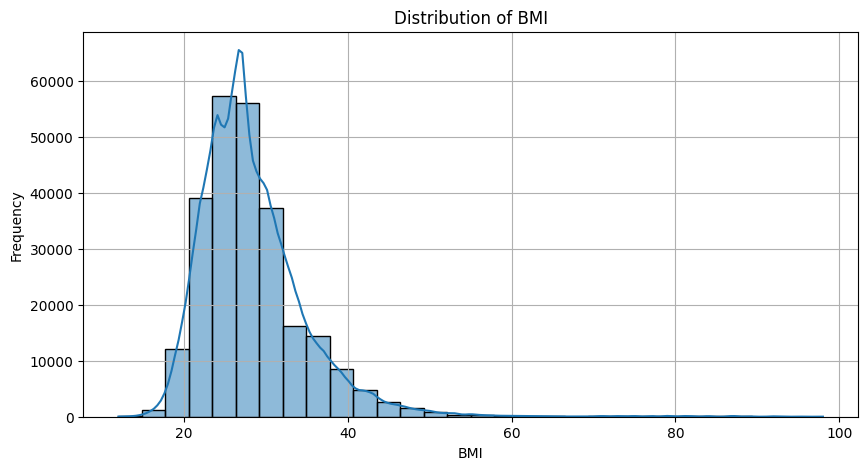

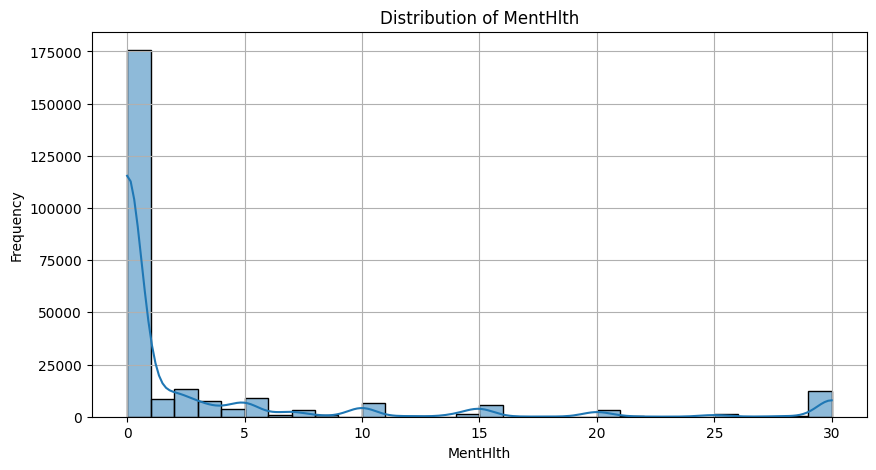

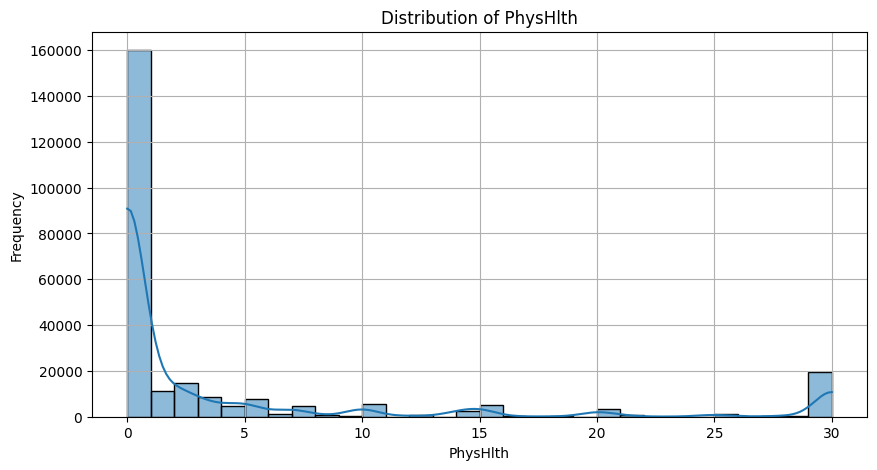

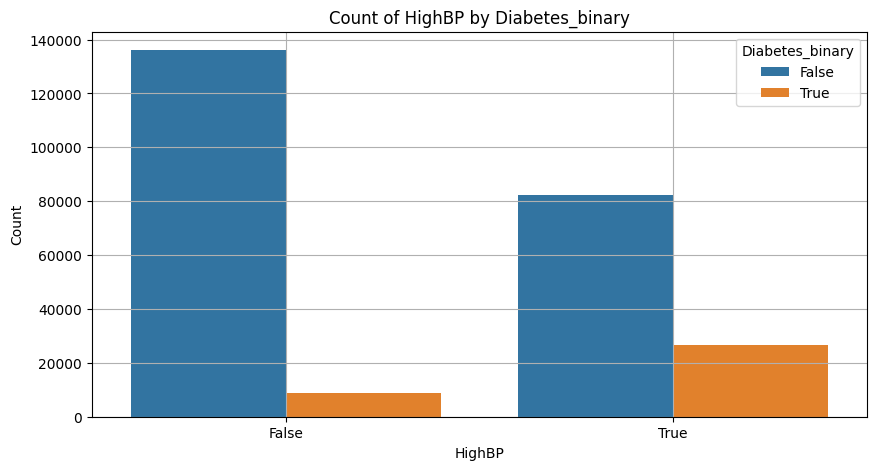

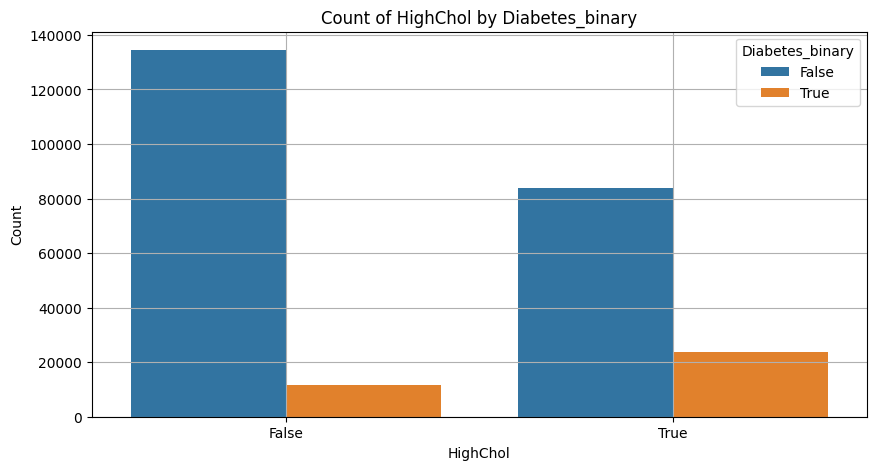

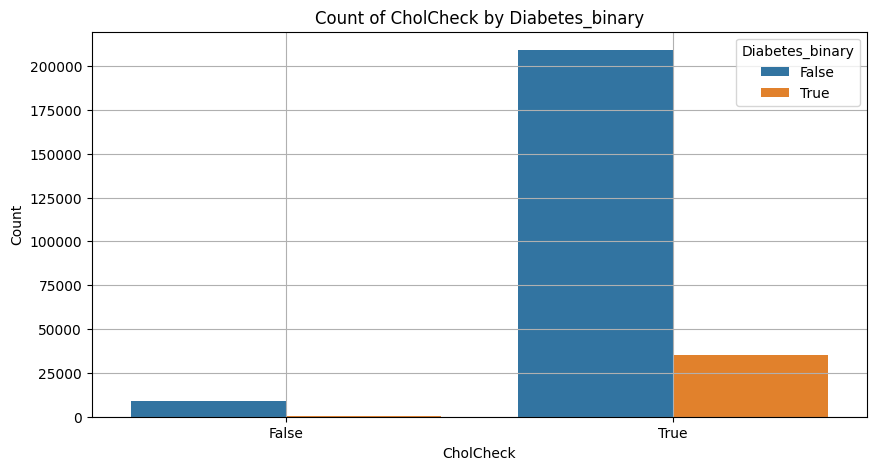

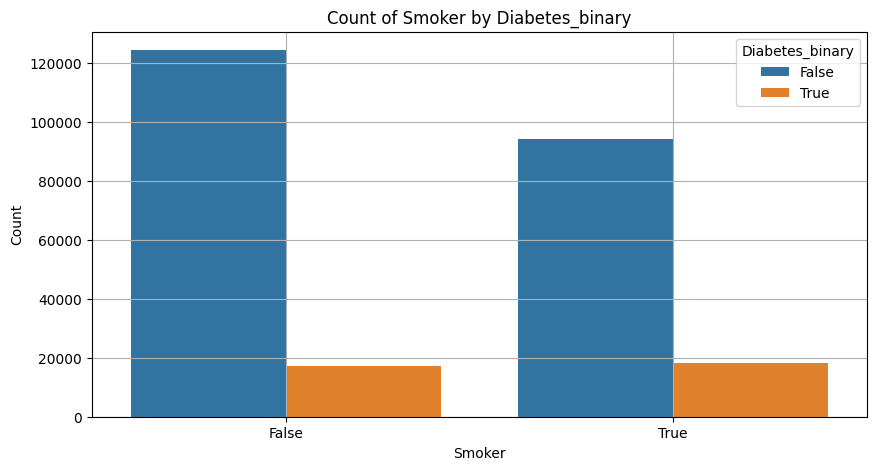

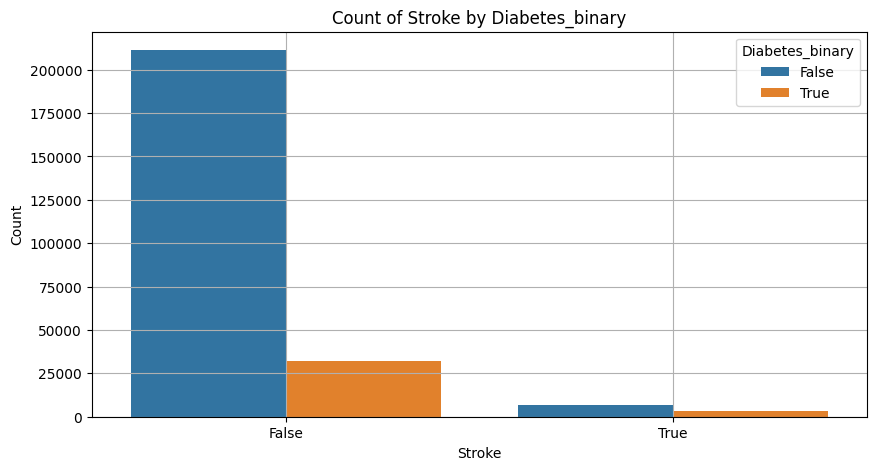

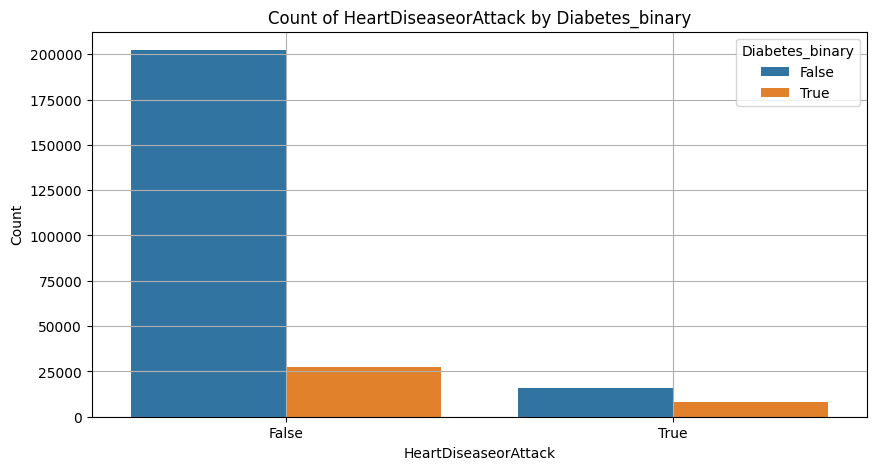

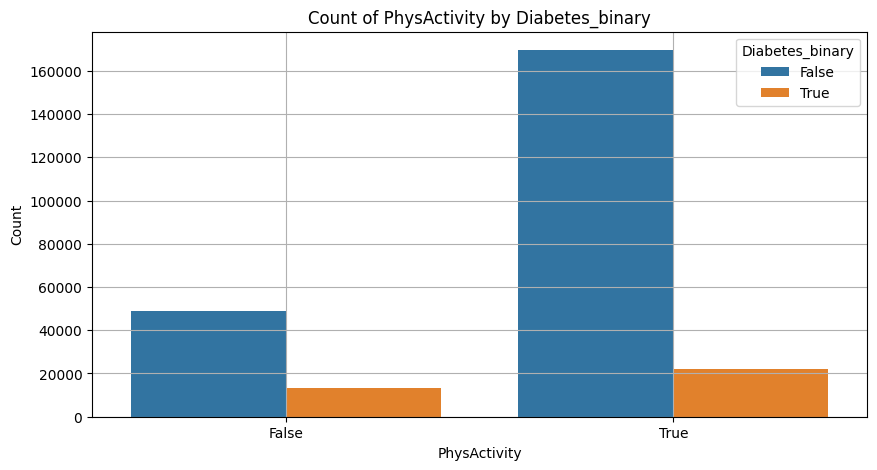

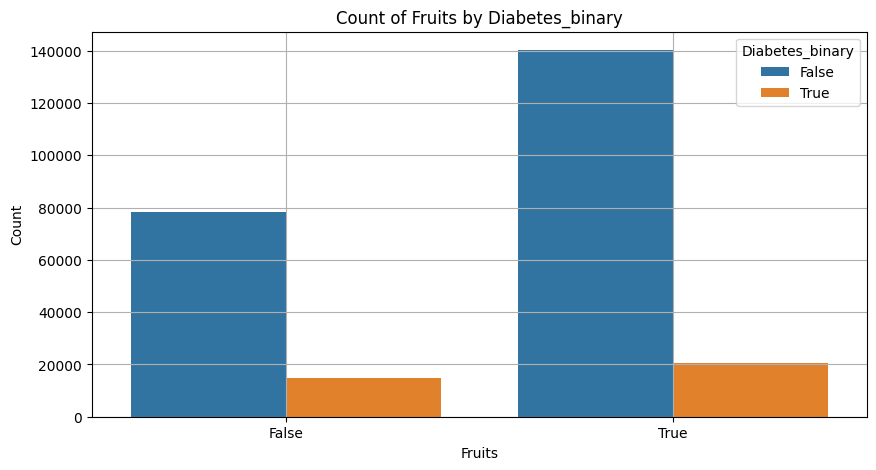

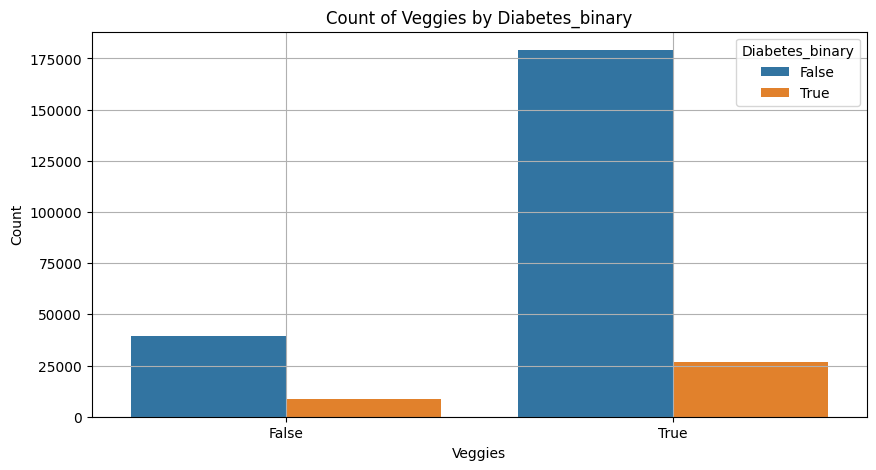

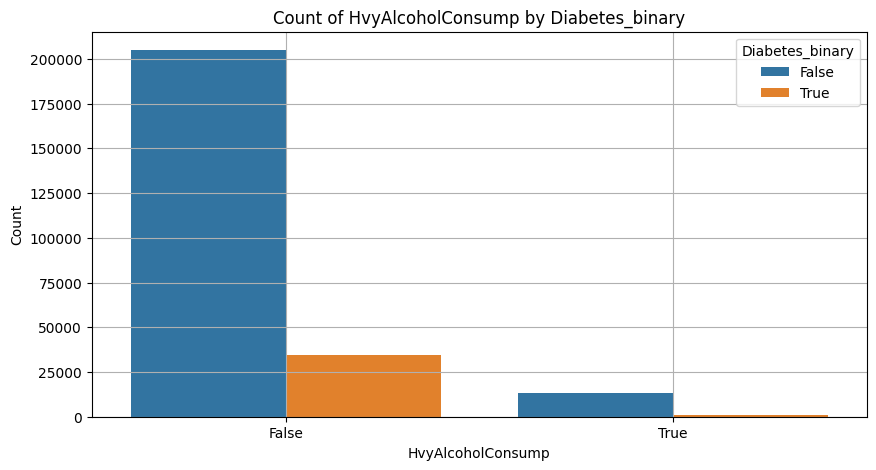

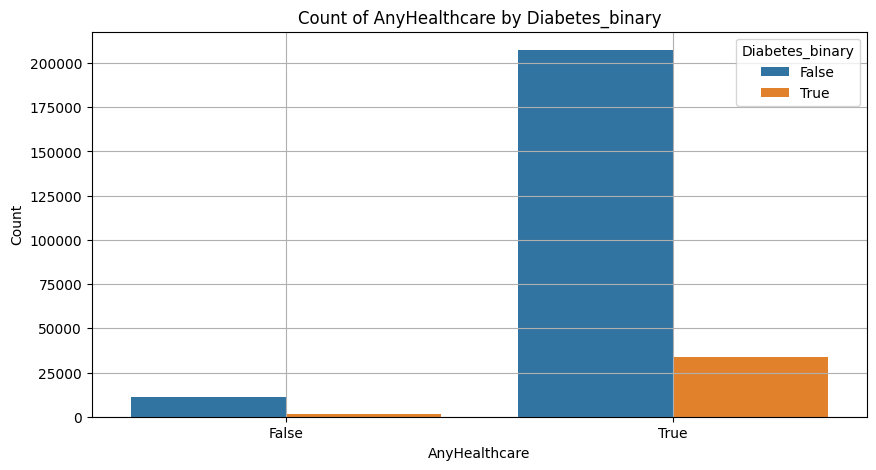

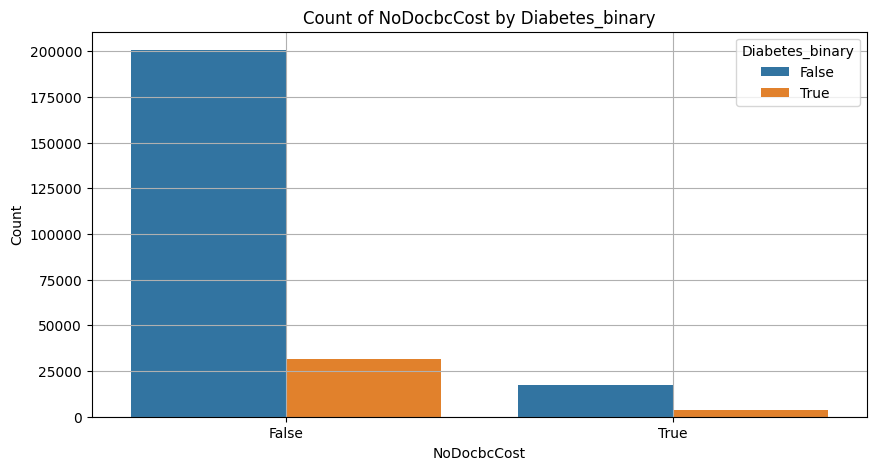

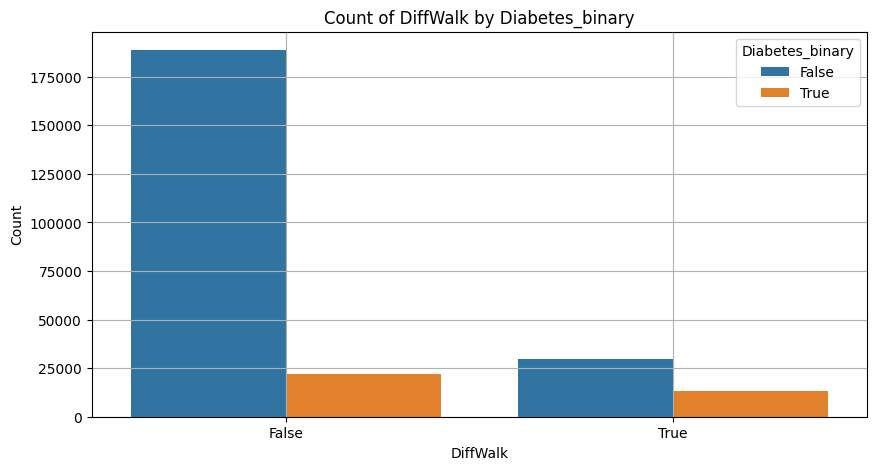

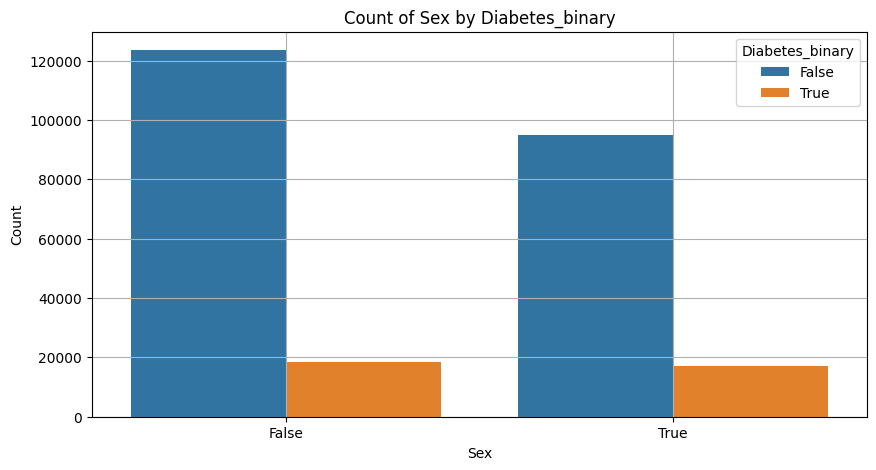

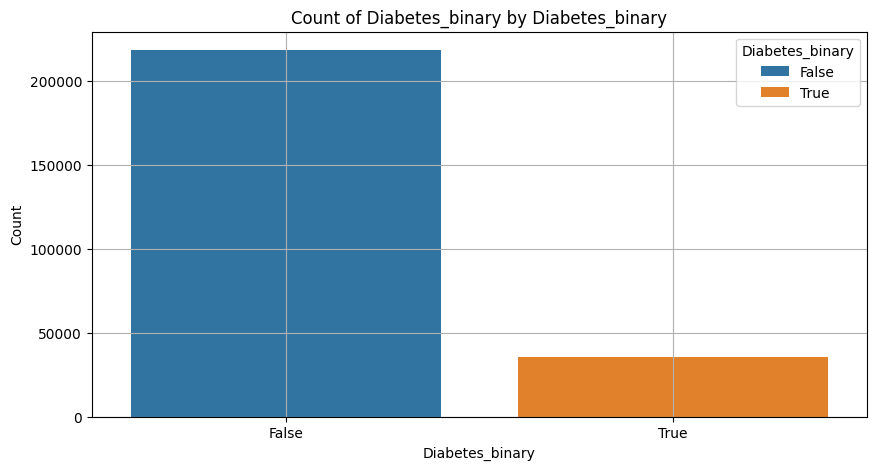

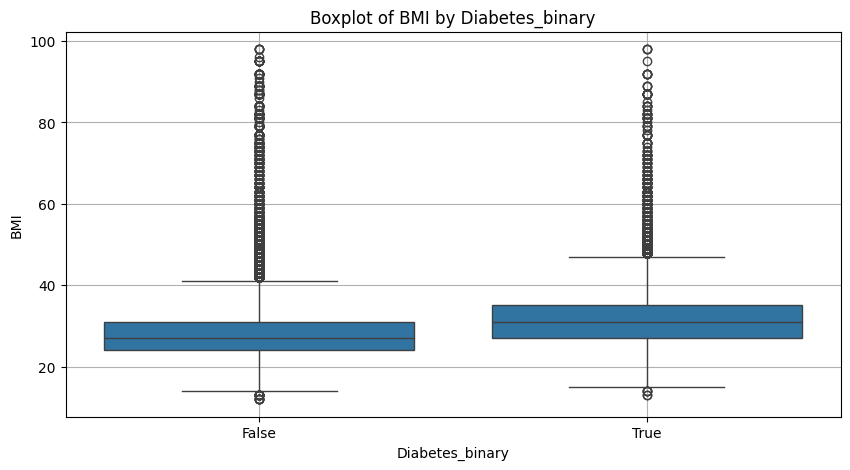

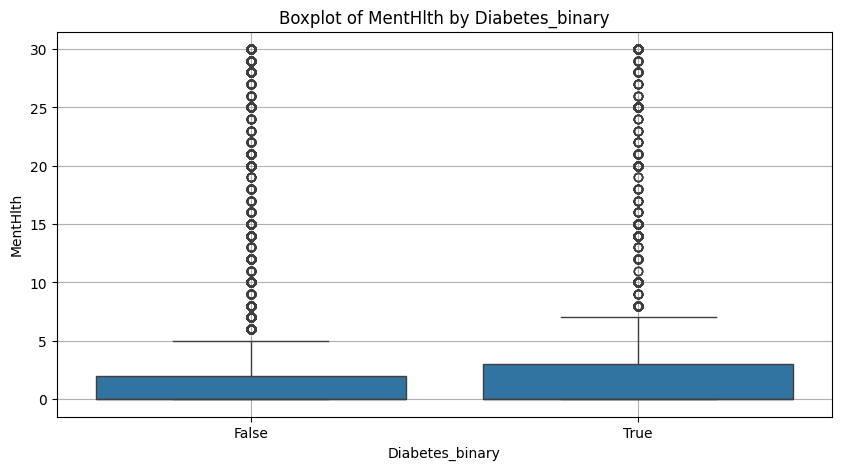

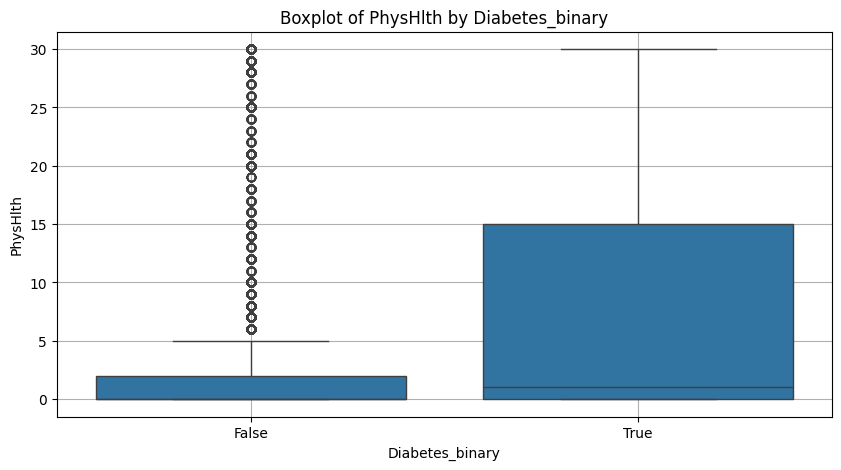

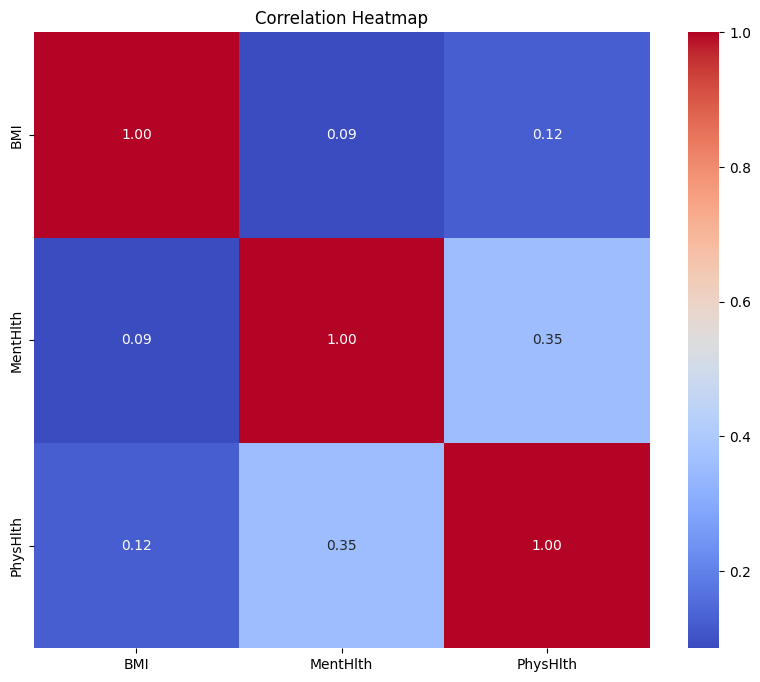

In [ ]:
# Run EDA Functions
summary_statistics(data)
plot_numeric_distributions(data)
plot_binary_counts(data, 'Diabetes_binary')
plot_boxplots(data, 'Diabetes_binary')
#plot_crosstab(data, 'Diabetes_binary')
plot_correlation_heatmap(data)

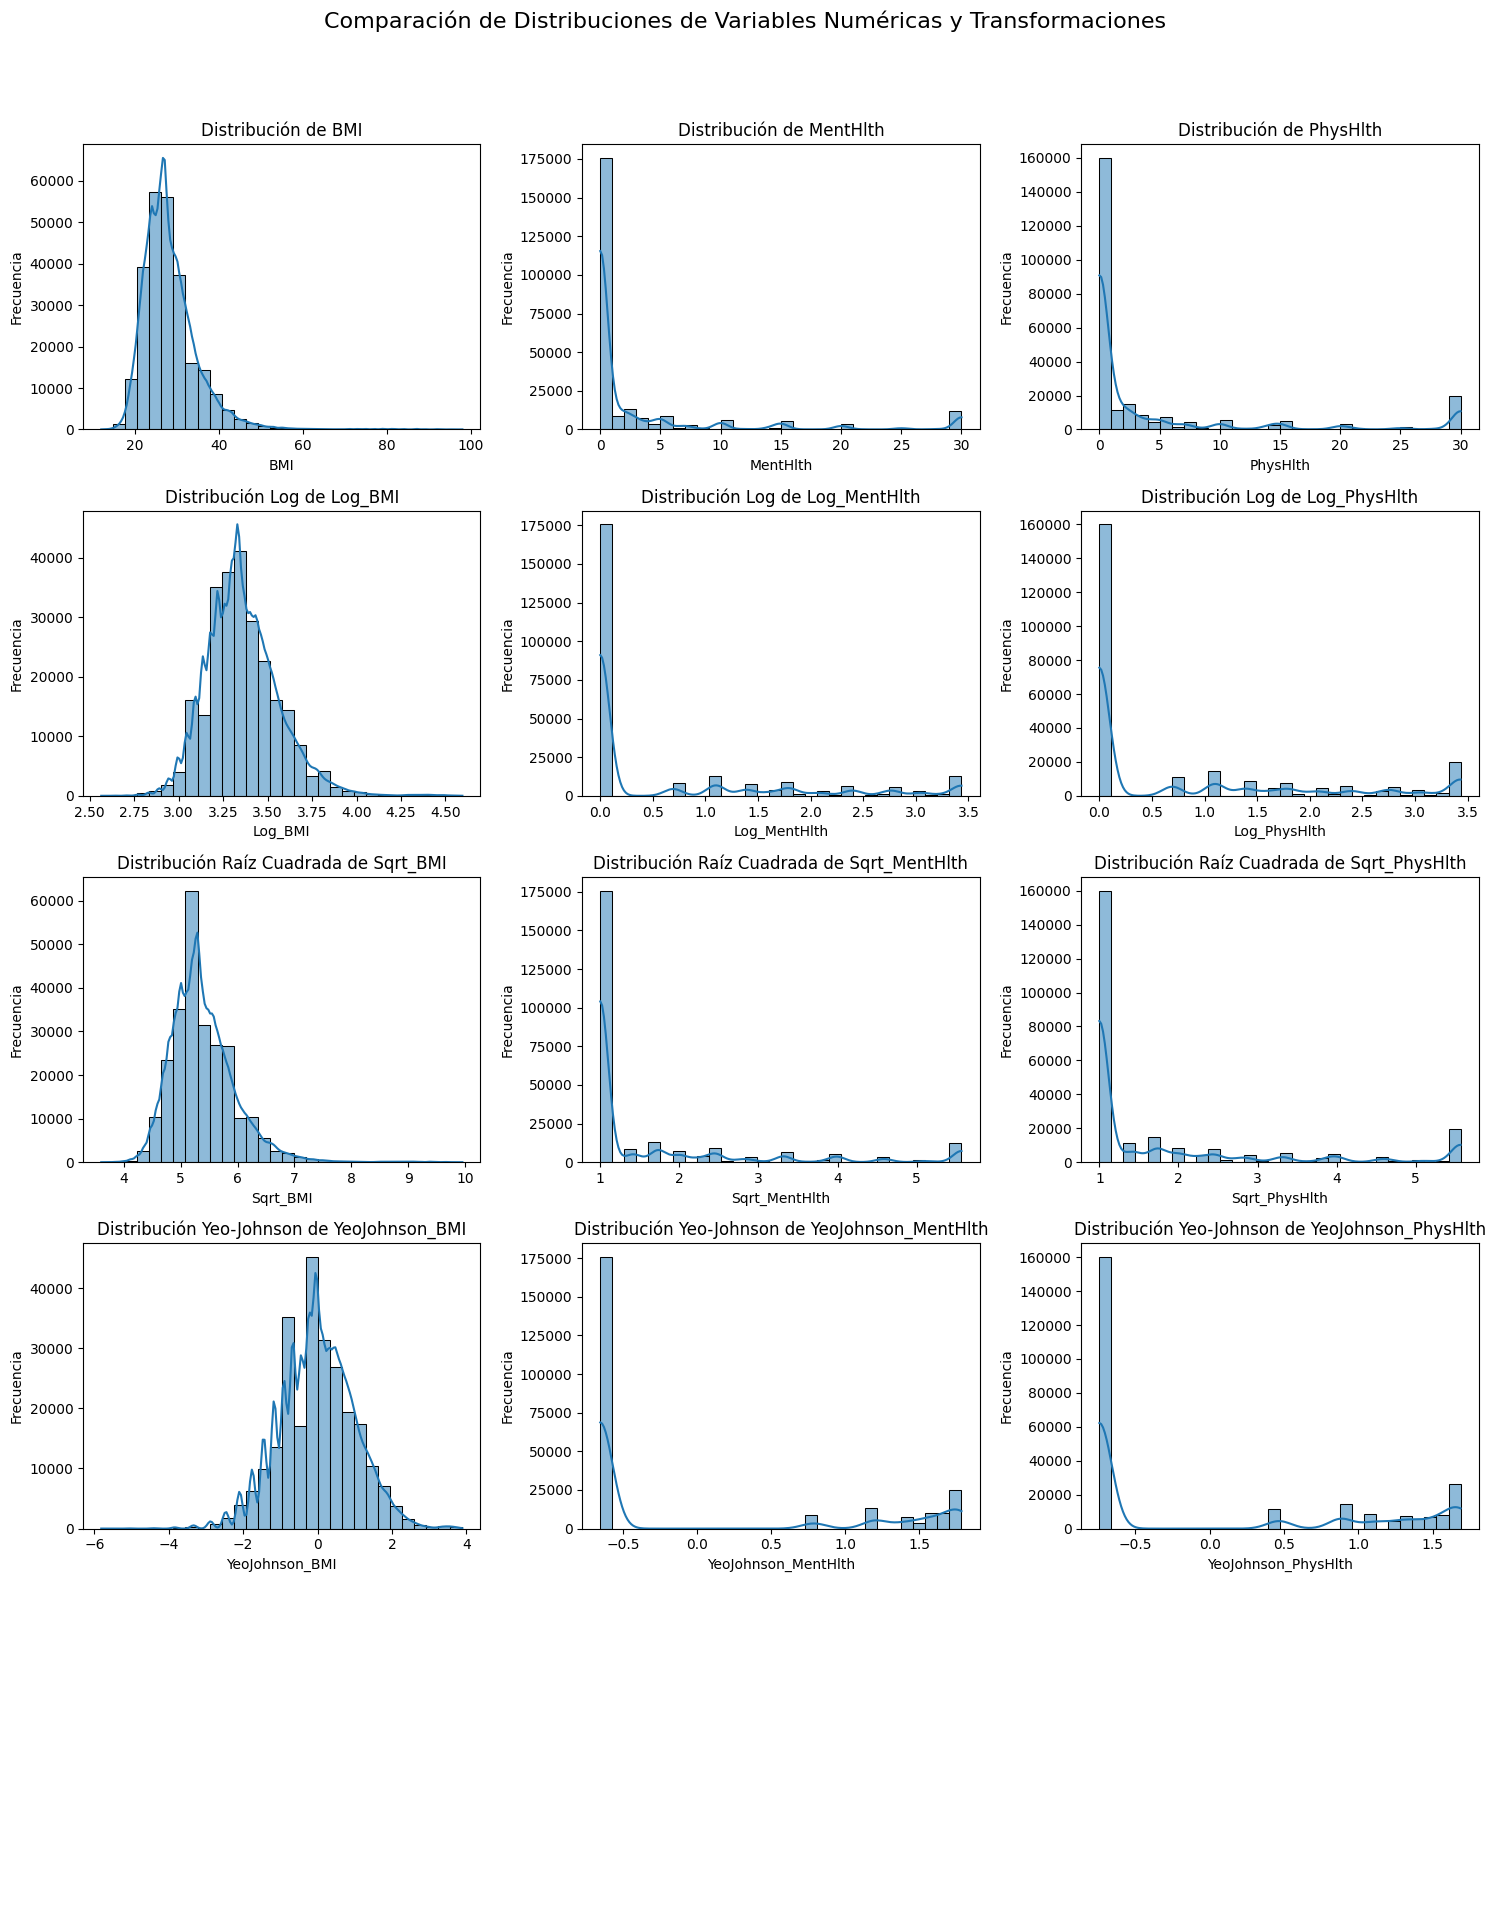

In [ ]:
# Crear un DataFrame temporal para las transformaciones
temp_data = data.copy()

# Crear las transformaciones en el DataFrame temporal
temp_data['Log_BMI'] = np.log(temp_data['BMI'] + 1)
temp_data['Log_MentHlth'] = np.log(temp_data['MentHlth'] + 1)
temp_data['Log_PhysHlth'] = np.log(temp_data['PhysHlth'] + 1)

temp_data['Sqrt_BMI'] = np.sqrt(temp_data['BMI'] + 1)
temp_data['Sqrt_MentHlth'] = np.sqrt(temp_data['MentHlth'] + 1)
temp_data['Sqrt_PhysHlth'] = np.sqrt(temp_data['PhysHlth'] + 1)

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
temp_data[['YeoJohnson_BMI', 'YeoJohnson_MentHlth', 'YeoJohnson_PhysHlth']] = pt.fit_transform(temp_data[['BMI', 'MentHlth', 'PhysHlth']])

# Configurar la figura para múltiples subgráficas
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.suptitle('Comparación de Distribuciones de Variables Numéricas y Transformaciones', fontsize=16)

# Originales
for i, col in enumerate(['BMI', 'MentHlth', 'PhysHlth']):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribución de {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frecuencia')

# Transformación Logarítmica
for i, col in enumerate(['Log_BMI', 'Log_MentHlth', 'Log_PhysHlth']):
    sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Distribución Log de {col}')
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel('Frecuencia')

# Transformación de Raíz Cuadrada
for i, col in enumerate(['Sqrt_BMI', 'Sqrt_MentHlth', 'Sqrt_PhysHlth']):
    sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[2, i])
    axes[2, i].set_title(f'Distribución Raíz Cuadrada de {col}')
    axes[2, i].set_xlabel(col)
    axes[2, i].set_ylabel('Frecuencia')

# Transformación Yeo-Johnson
for i, col in enumerate(['YeoJohnson_BMI', 'YeoJohnson_MentHlth', 'YeoJohnson_PhysHlth']):
    sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[3, i])
    axes[3, i].set_title(f'Distribución Yeo-Johnson de {col}')
    axes[3, i].set_xlabel(col)
    axes[3, i].set_ylabel('Frecuencia')

# Ocupando el espacio en la última fila (puedes ajustar o agregar más gráficas)
for ax in axes[4]:
    ax.axis('off')  # O puedes agregar otras gráficas aquí

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar layout
plt.show()


In [ ]:
# Inicializa el codificador
label_encoder = LabelEncoder()

# Aplica el Label Encoding a las columnas ordinales
data['GenHlth'] = label_encoder.fit_transform(data['GenHlth'])
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Income'] = label_encoder.fit_transform(data['Income'])

# Muestra el DataFrame transformado
print(data[['GenHlth', 'Age', 'Education','Income']])

        GenHlth  Age  Education  Income
0             4    8          3       2
1             2    6          5       0
2             4    8          3       7
3             1   10          2       5
4             1   10          4       3
...         ...  ...        ...     ...
253675        2    4          5       6
253676        3   10          1       3
253677        0    1          4       1
253678        2    6          4       0
253679        1    8          5       1

[253680 rows x 4 columns]


In [ ]:
# Aplicar Yeo-Johnson y reemplazar las columnas originales
pt = PowerTransformer(method='yeo-johnson')
data[['BMI', 'MentHlth', 'PhysHlth']] = pt.fit_transform(data[['BMI', 'MentHlth', 'PhysHlth']])

# Estandarizar las variables transformadas y reemplazar las columnas originales
scaler = StandardScaler()
data[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(data[['BMI', 'MentHlth', 'PhysHlth']])

# Mostrar el DataFrame transformado y estandarizado
print(data[['BMI', 'MentHlth', 'PhysHlth']])

             BMI  MentHlth  PhysHlth
0       1.638596  1.756345  1.600664
1      -0.445654 -0.656074 -0.740983
2       0.134514  1.783950  1.687864
3      -0.045740 -0.656074 -0.740983
4      -0.668354  1.387448 -0.740983
...          ...       ...       ...
253675  2.043198 -0.656074  1.316475
253676 -2.467499 -0.656074 -0.740983
253677  0.134514 -0.656074 -0.740983
253678 -0.908655 -0.656074 -0.740983
253679 -0.445654 -0.656074 -0.740983

[253680 rows x 3 columns]


In [ ]:
# Check the data types
print(data.dtypes)

HighBP                     bool
HighChol                   bool
CholCheck                  bool
BMI                     float64
Smoker                     bool
Stroke                     bool
HeartDiseaseorAttack       bool
PhysActivity               bool
Fruits                     bool
Veggies                    bool
HvyAlcoholConsump          bool
AnyHealthcare              bool
NoDocbcCost                bool
GenHlth                   int64
MentHlth                float64
PhysHlth                float64
DiffWalk                   bool
Sex                        bool
Age                       int64
Education                 int64
Income                    int64
Diabetes_binary            bool
dtype: object


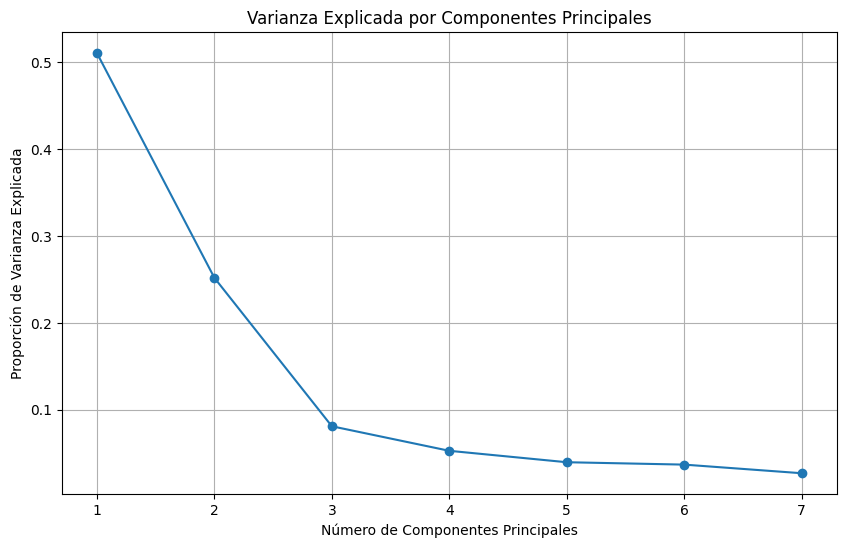

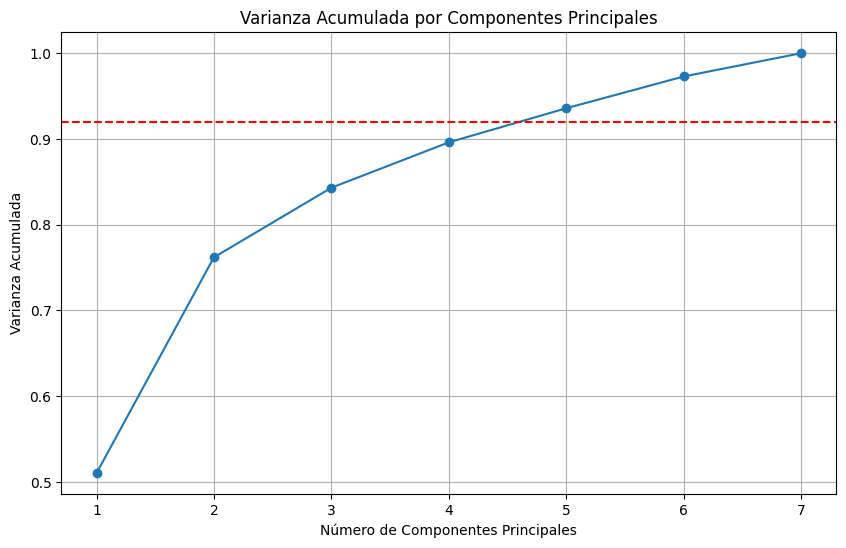

In [ ]:
# Seleccionar características para PCA (variables ya transformadas y escaladas)
X = data[['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']]

# Inicializa PCA y ajusta el modelo
pca = PCA()
pca.fit(X)

# Variancia explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Crea un gráfico de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid()
plt.show()

# Crea un gráfico de varianza acumulada
plt.figure(figsize=(10, 6))
cumulative_variance = explained_variance.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Varianza Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.axhline(y=0.92, color='r', linestyle='--')  # Umbral del 92%
plt.show()

In [ ]:
# Seleccionar características para PCA (variables ya transformadas y escaladas)
X = data[['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']]

# Aplicar PCA
pca = PCA(n_components=5)  # Elegir cuántas componentes principales mantener
X_pca = pca.fit_transform(X)

# Convertir el resultado a un DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(5)])

# Unir las componentes principales con el DataFrame original, excluyendo las variables originales
final_df = pd.concat([data.drop(columns=['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']).reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Mostrar el DataFrame final
print(final_df.head())

   HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0    True      True       True    True   False                 False   
1   False     False      False    True   False                 False   
2    True      True       True   False   False                 False   
3    True     False       True   False   False                 False   
4    True      True       True   False   False                 False   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0         False   False     True              False           True   
1          True   False    False              False          False   
2         False    True    False              False           True   
3          True    True     True              False           True   
4          True    True     True              False           True   

   NoDocbcCost  DiffWalk    Sex  Diabetes_binary       PC1       PC2  \
0        False      True  False            False  1.694009 -4.000470   
1 